In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
# Path ke direktori dataset
train_dir = "./dataset/rgb_masking/train"
validation_dir = "./dataset/rgb/val"

In [4]:
# Parameter augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

# Load data validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

Found 1252 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [5]:
# Define the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

<ipython-input-5-70eda4ad62ba>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [6]:
# Checkpoint
filepath = "./models/Baru/MobileNetV2-RGB.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
callback_list = [checkpoint]

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=callback_list)

# Save the final model
model.save("./models/Baru/MobileNetV2-RGB.h5")

Epoch 1/50


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6771 - loss: 1.0129 - precision: 0.7200 - recall: 0.6302
Epoch 1: val_loss improved from inf to 0.05343, saving model to ./models/Baru/MobileNetV2-RGB.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 188s 8s/step - accuracy: 0.6829 - loss: 0.9916 - precision: 0.7261 - recall: 0.6361 - val_accuracy: 0.9937 - val_loss: 0.0534 - val_precision: 0.9937 - val_recall: 0.9937
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9404 - loss: 0.1168 - precision: 0.9731 - recall: 0.9216
Epoch 2: val_loss improved from 0.05343 to 0.02615, saving model to ./models/Baru/MobileNetV2-RGB.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 158s 8s/step - accuracy: 0.9404 - loss: 0.1171 - precision: 0.9729 - recall: 0.9216 - val_accuracy: 0.9968 - val_loss: 0.0262 - val_precision: 0.9968 - val_recall: 0.9968
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9570 - loss: 0.0948 - precision: 0.9771 - recall: 0.9266
Epoch 3: val_loss did not improve from 0.02615
20/2

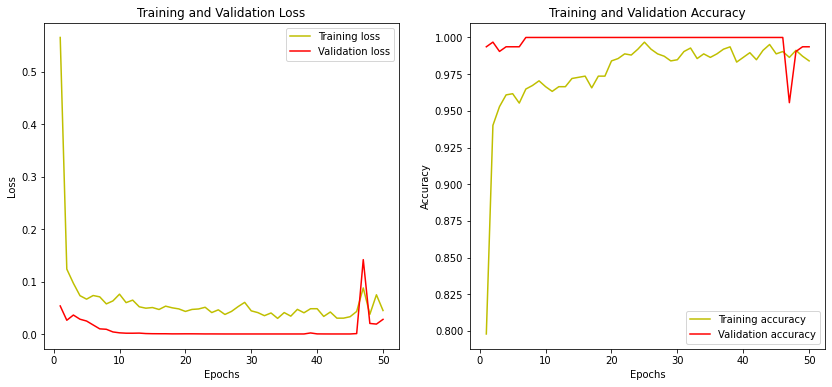

In [7]:
# Plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Training and Validation Loss
ax1.plot(epochs, loss, 'y', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training and Validation Accuracy
ax2.plot(epochs, acc, 'y', label='Training accuracy')
ax2.plot(epochs, val_acc, 'r', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()